              Assignment No 14- Decision Tree (Question No 2 - Fraud_Check Data)

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Fraud_check.csv")
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [3]:
df.shape

(600, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df = df.rename({'Undergrad':'u_grad',
               'Marital.Status':'mar_status',
               'Taxable.Income':'tax_inc',
               'City.Population':'population',
               'Work.Experience':'exp',
               'Urban':'urban'
               },axis =1)
df

u_grad mar_status  tax_inc  population  exp urban
0       NO     Single    68833       50047   10   YES
1      YES   Divorced    33700      134075   18   YES
2       NO    Married    36925      160205   30   YES
3      YES     Single    50190      193264   15   YES
4       NO    Married    81002       27533   28    NO
..     ...        ...      ...         ...  ...   ...
595    YES   Divorced    76340       39492    7   YES
596    YES   Divorced    69967       55369    2   YES
597     NO   Divorced    47334      154058    0   YES
598    YES    Married    98592      180083   17    NO
599     NO   Divorced    96519      158137   16    NO

[600 rows x 6 columns]

In [6]:
encoder = LabelEncoder()
df['u_grad'] =encoder.fit_transform(df['u_grad'])
df['mar_status'] =encoder.fit_transform(df['mar_status'])
df['urban'] =encoder.fit_transform(df['urban'])
df

u_grad  mar_status  tax_inc  population  exp  urban
0         0           2    68833       50047   10      1
1         1           0    33700      134075   18      1
2         0           1    36925      160205   30      1
3         1           2    50190      193264   15      1
4         0           1    81002       27533   28      0
..      ...         ...      ...         ...  ...    ...
595       1           0    76340       39492    7      1
596       1           0    69967       55369    2      1
597       0           0    47334      154058    0      1
598       1           1    98592      180083   17      0
599       0           0    96519      158137   16      0

[600 rows x 6 columns]

In [7]:
df['u_grad'].value_counts()

1    312
0    288
Name: u_grad, dtype: int64

In [8]:
df['mar_status'].value_counts()

2    217
1    194
0    189
Name: mar_status, dtype: int64

In [9]:
df['tax_inc'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: tax_inc, dtype: float64

In [10]:
df.insert(6,'tax_class'," ")

for i in range(0,len(df['tax_inc']),1):
    if df['tax_inc'].iloc[i]<=30000:
        df['tax_class'].iloc[i]='Risky'
    else:
        df['tax_class'].iloc[i]='Good'

C:\Users\Gujar\AppData\Local\Temp\ipykernel_24076\3497965543.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_class'].iloc[i]='Good'
C:\Users\Gujar\AppData\Local\Temp\ipykernel_24076\3497965543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_class'].iloc[i]='Risky'


In [11]:
df['tax_class'].value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [12]:
df

u_grad  mar_status  tax_inc  population  exp  urban tax_class
0         0           2    68833       50047   10      1      Good
1         1           0    33700      134075   18      1      Good
2         0           1    36925      160205   30      1      Good
3         1           2    50190      193264   15      1      Good
4         0           1    81002       27533   28      0      Good
..      ...         ...      ...         ...  ...    ...       ...
595       1           0    76340       39492    7      1      Good
596       1           0    69967       55369    2      1      Good
597       0           0    47334      154058    0      1      Good
598       1           1    98592      180083   17      0      Good
599       0           0    96519      158137   16      0      Good

[600 rows x 7 columns]

In [13]:
df.describe()

u_grad  mar_status       tax_inc     population         exp  \
count  600.000000  600.000000    600.000000     600.000000  600.000000   
mean     0.520000    1.046667  55208.375000  108747.368333   15.558333   
std      0.500017    0.821958  26204.827597   49850.075134    8.842147   
min      0.000000    0.000000  10003.000000   25779.000000    0.000000   
25%      0.000000    0.000000  32871.500000   66966.750000    8.000000   
50%      1.000000    1.000000  55074.500000  106493.500000   15.000000   
75%      1.000000    2.000000  78611.750000  150114.250000   24.000000   
max      1.000000    2.000000  99619.000000  199778.000000   30.000000   

            urban  
count  600.000000  
mean     0.503333  
std      0.500406  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

In [14]:
df[df.duplicated()] #No Duplicates

Empty DataFrame
Columns: [u_grad, mar_status, tax_inc, population, exp, urban, tax_class]
Index: []

<AxesSubplot:>

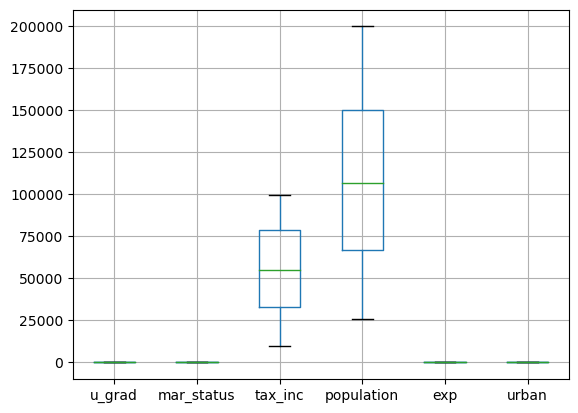

In [15]:
df.boxplot()

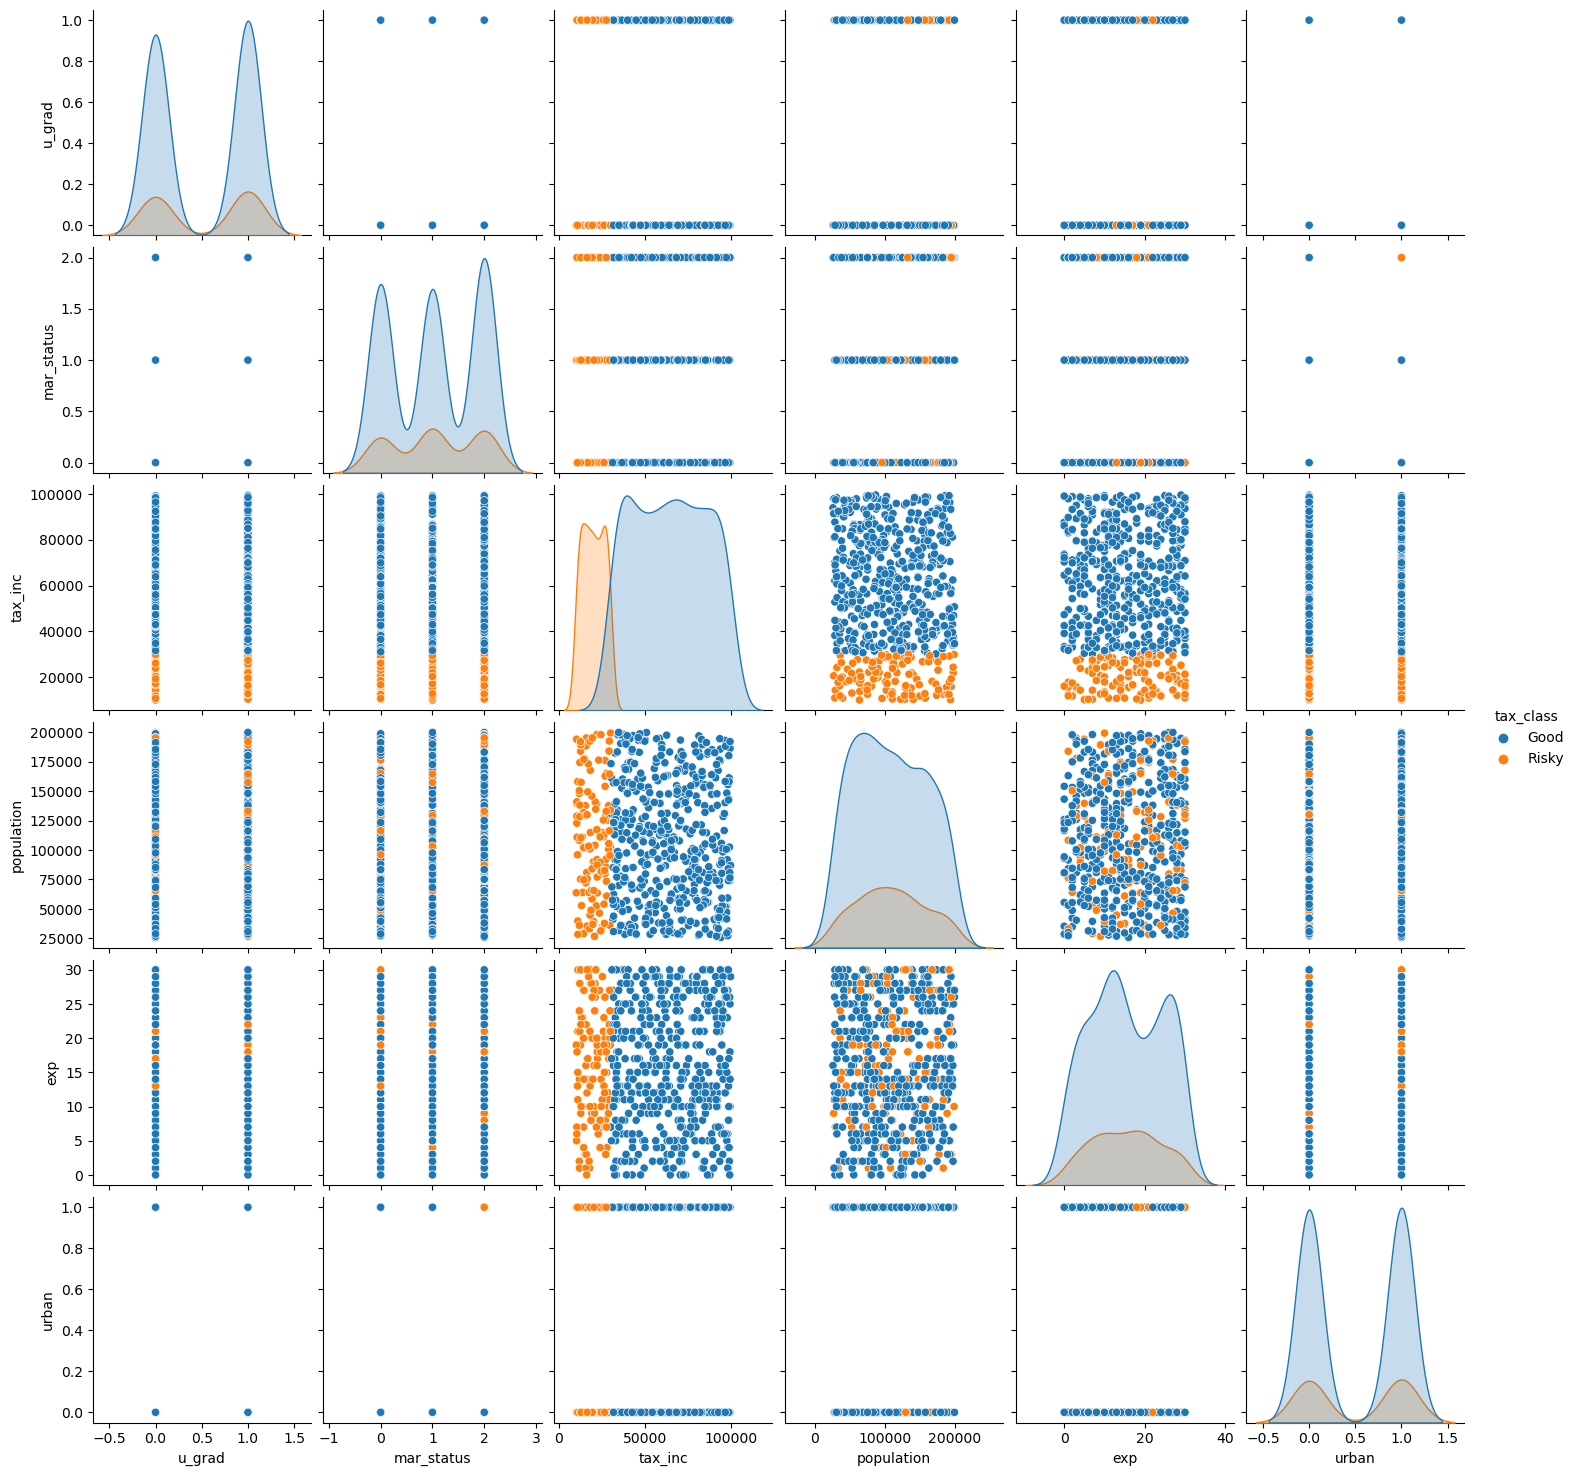

In [16]:
sns.pairplot(df, hue ='tax_class')
plt.show()

In [17]:
desired_columns = ['tax_inc', 'tax_class','u_grad', 'mar_status','population','exp','urban']

df = df.reindex(columns=desired_columns)

In [18]:
df

tax_inc tax_class  u_grad  mar_status  population  exp  urban
0      68833      Good       0           2       50047   10      1
1      33700      Good       1           0      134075   18      1
2      36925      Good       0           1      160205   30      1
3      50190      Good       1           2      193264   15      1
4      81002      Good       0           1       27533   28      0
..       ...       ...     ...         ...         ...  ...    ...
595    76340      Good       1           0       39492    7      1
596    69967      Good       1           0       55369    2      1
597    47334      Good       0           0      154058    0      1
598    98592      Good       1           1      180083   17      0
599    96519      Good       0           0      158137   16      0

[600 rows x 7 columns]

In [19]:
x = df.iloc[:,2:]
y = df['tax_class']

In [20]:
#Splitting data into train & test part                  
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.33,random_state=40)

                        Building Decision Tree Classifier using Entropy Criteria

In [26]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

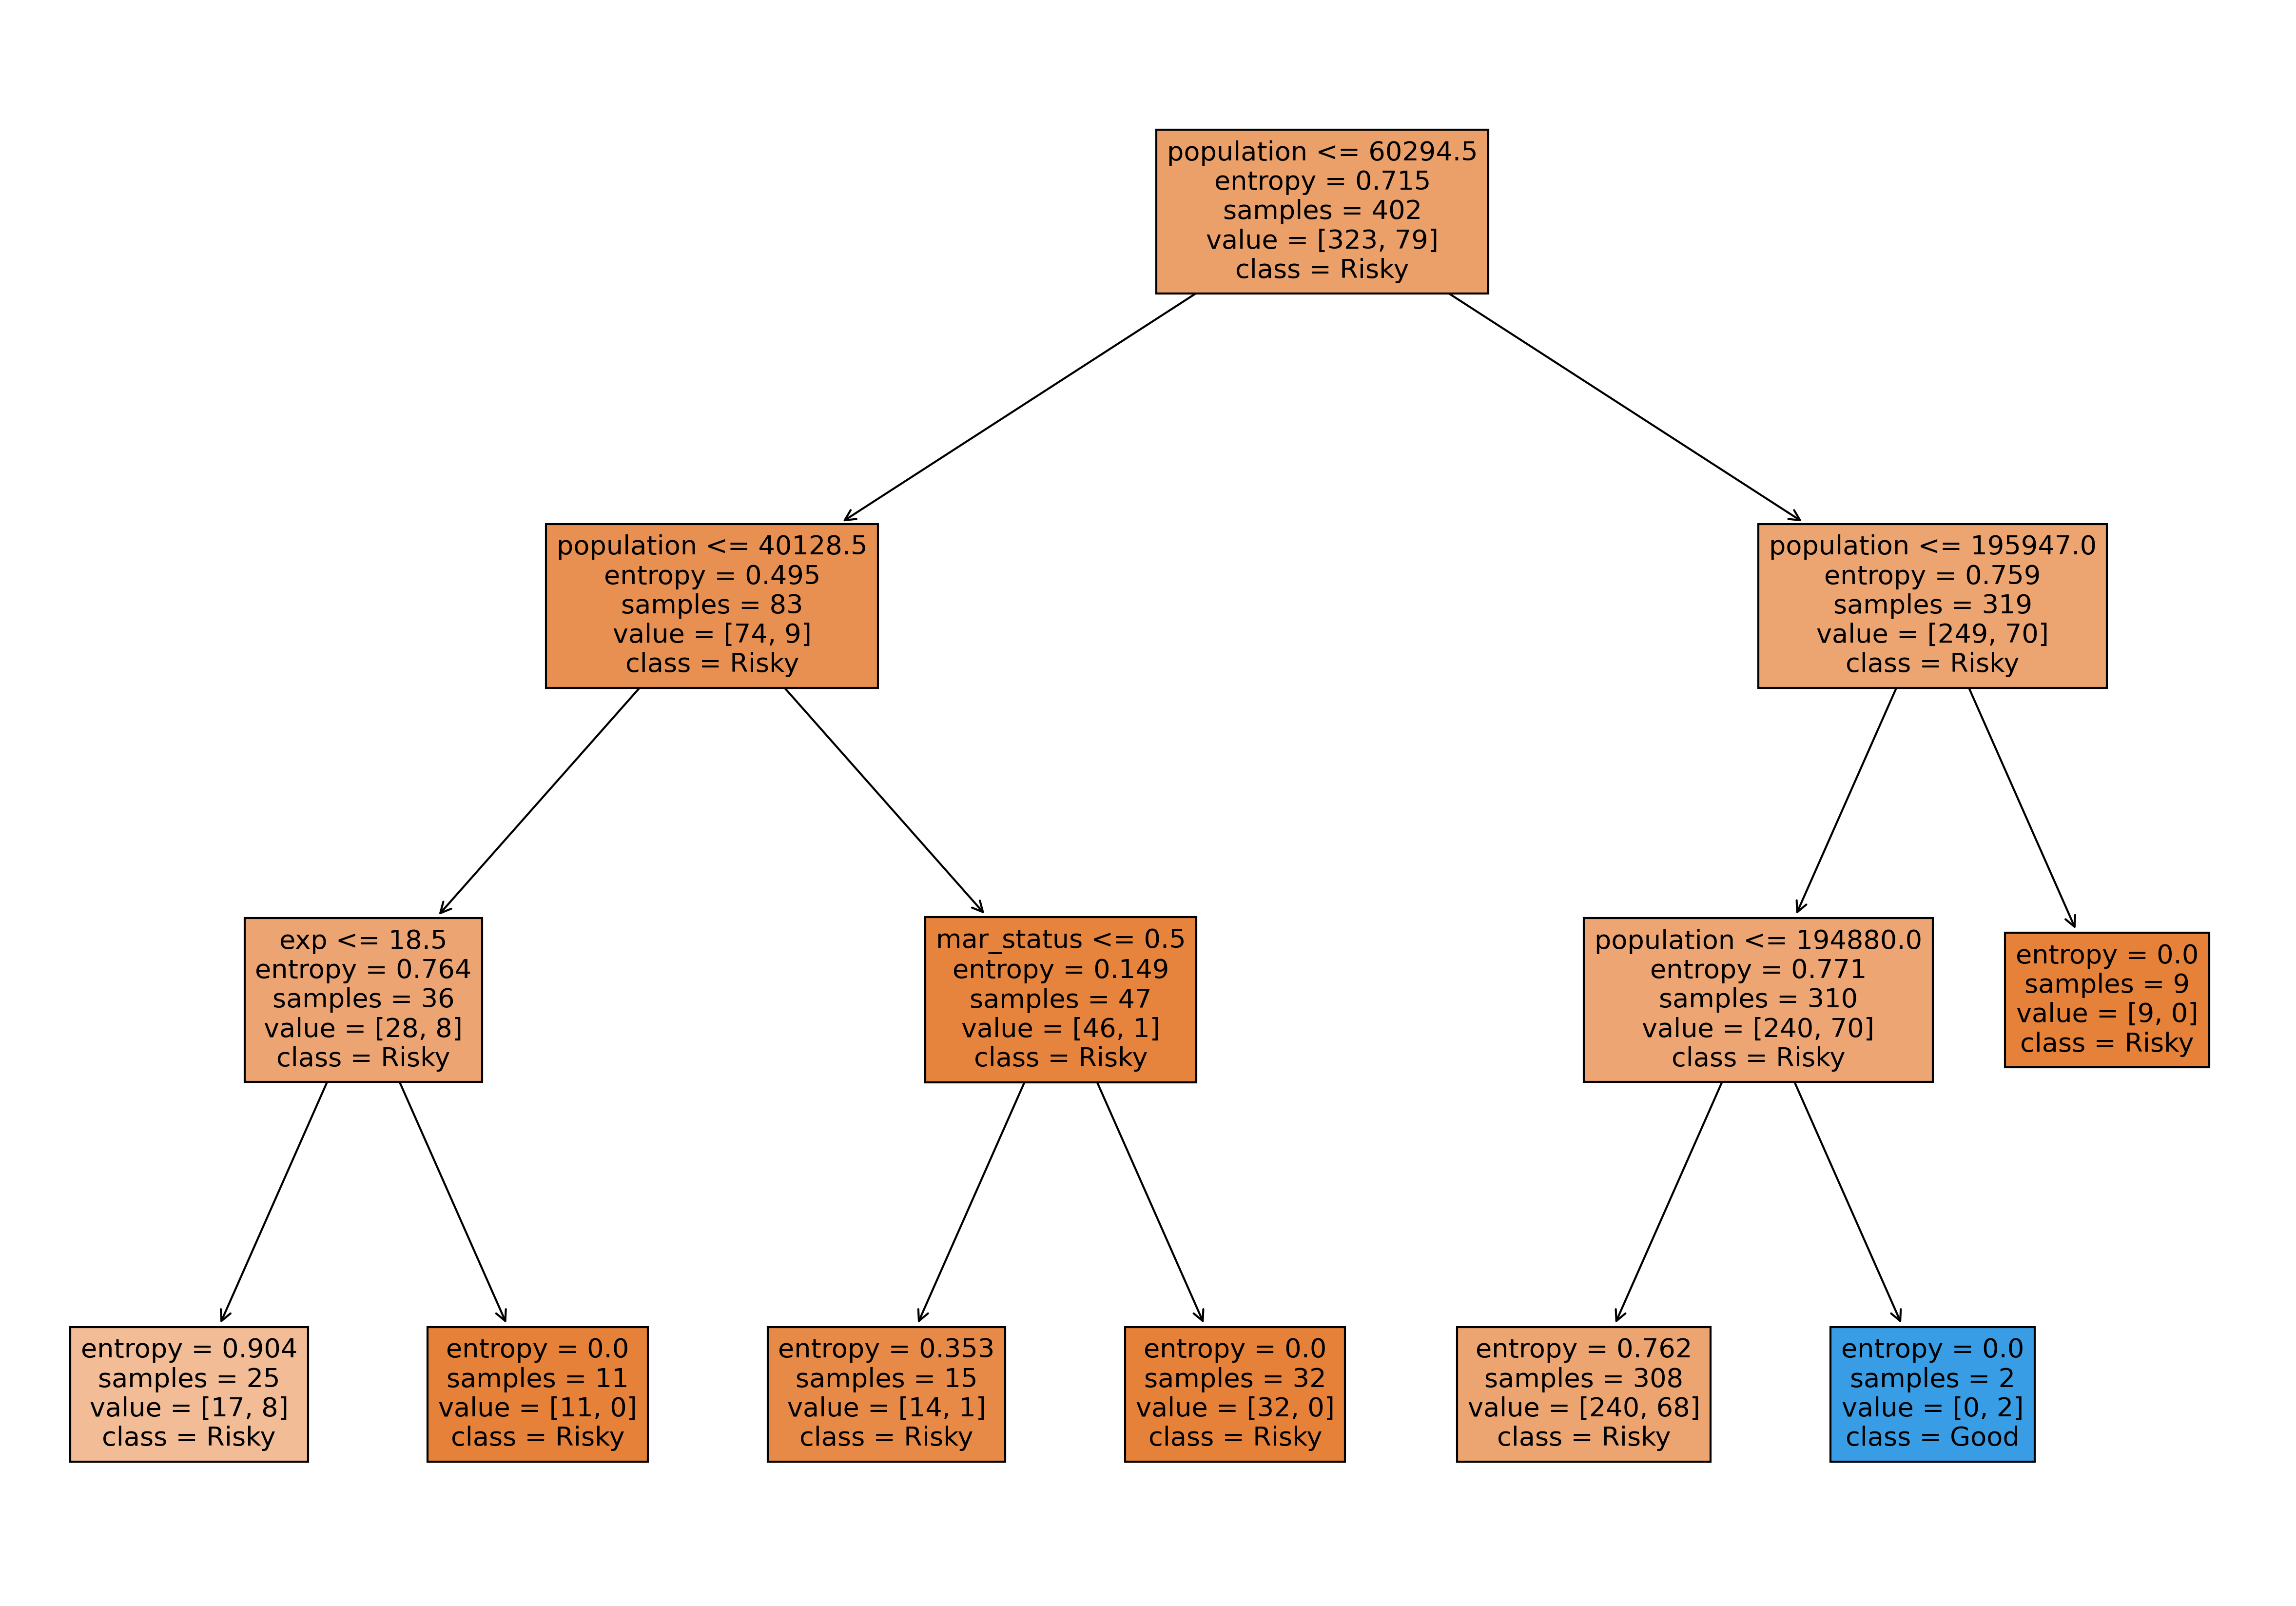

In [22]:
fn=['u_grad', 'mar_status','population','exp','urban']
tn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,14),dpi = 300)
plot_tree(model,
               feature_names = fn, 
               class_names=tn,
               filled = True)
plt.show()

In [23]:
#Predictions on test set.
preds = model.predict(x_test)
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [24]:
pd.Series(preds).value_counts()

Good     197
Risky      1
dtype: int64

In [25]:
np.mean(preds == y_test)

0.7676767676767676

                          Decision tree Using Gini Index

In [27]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth =4)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

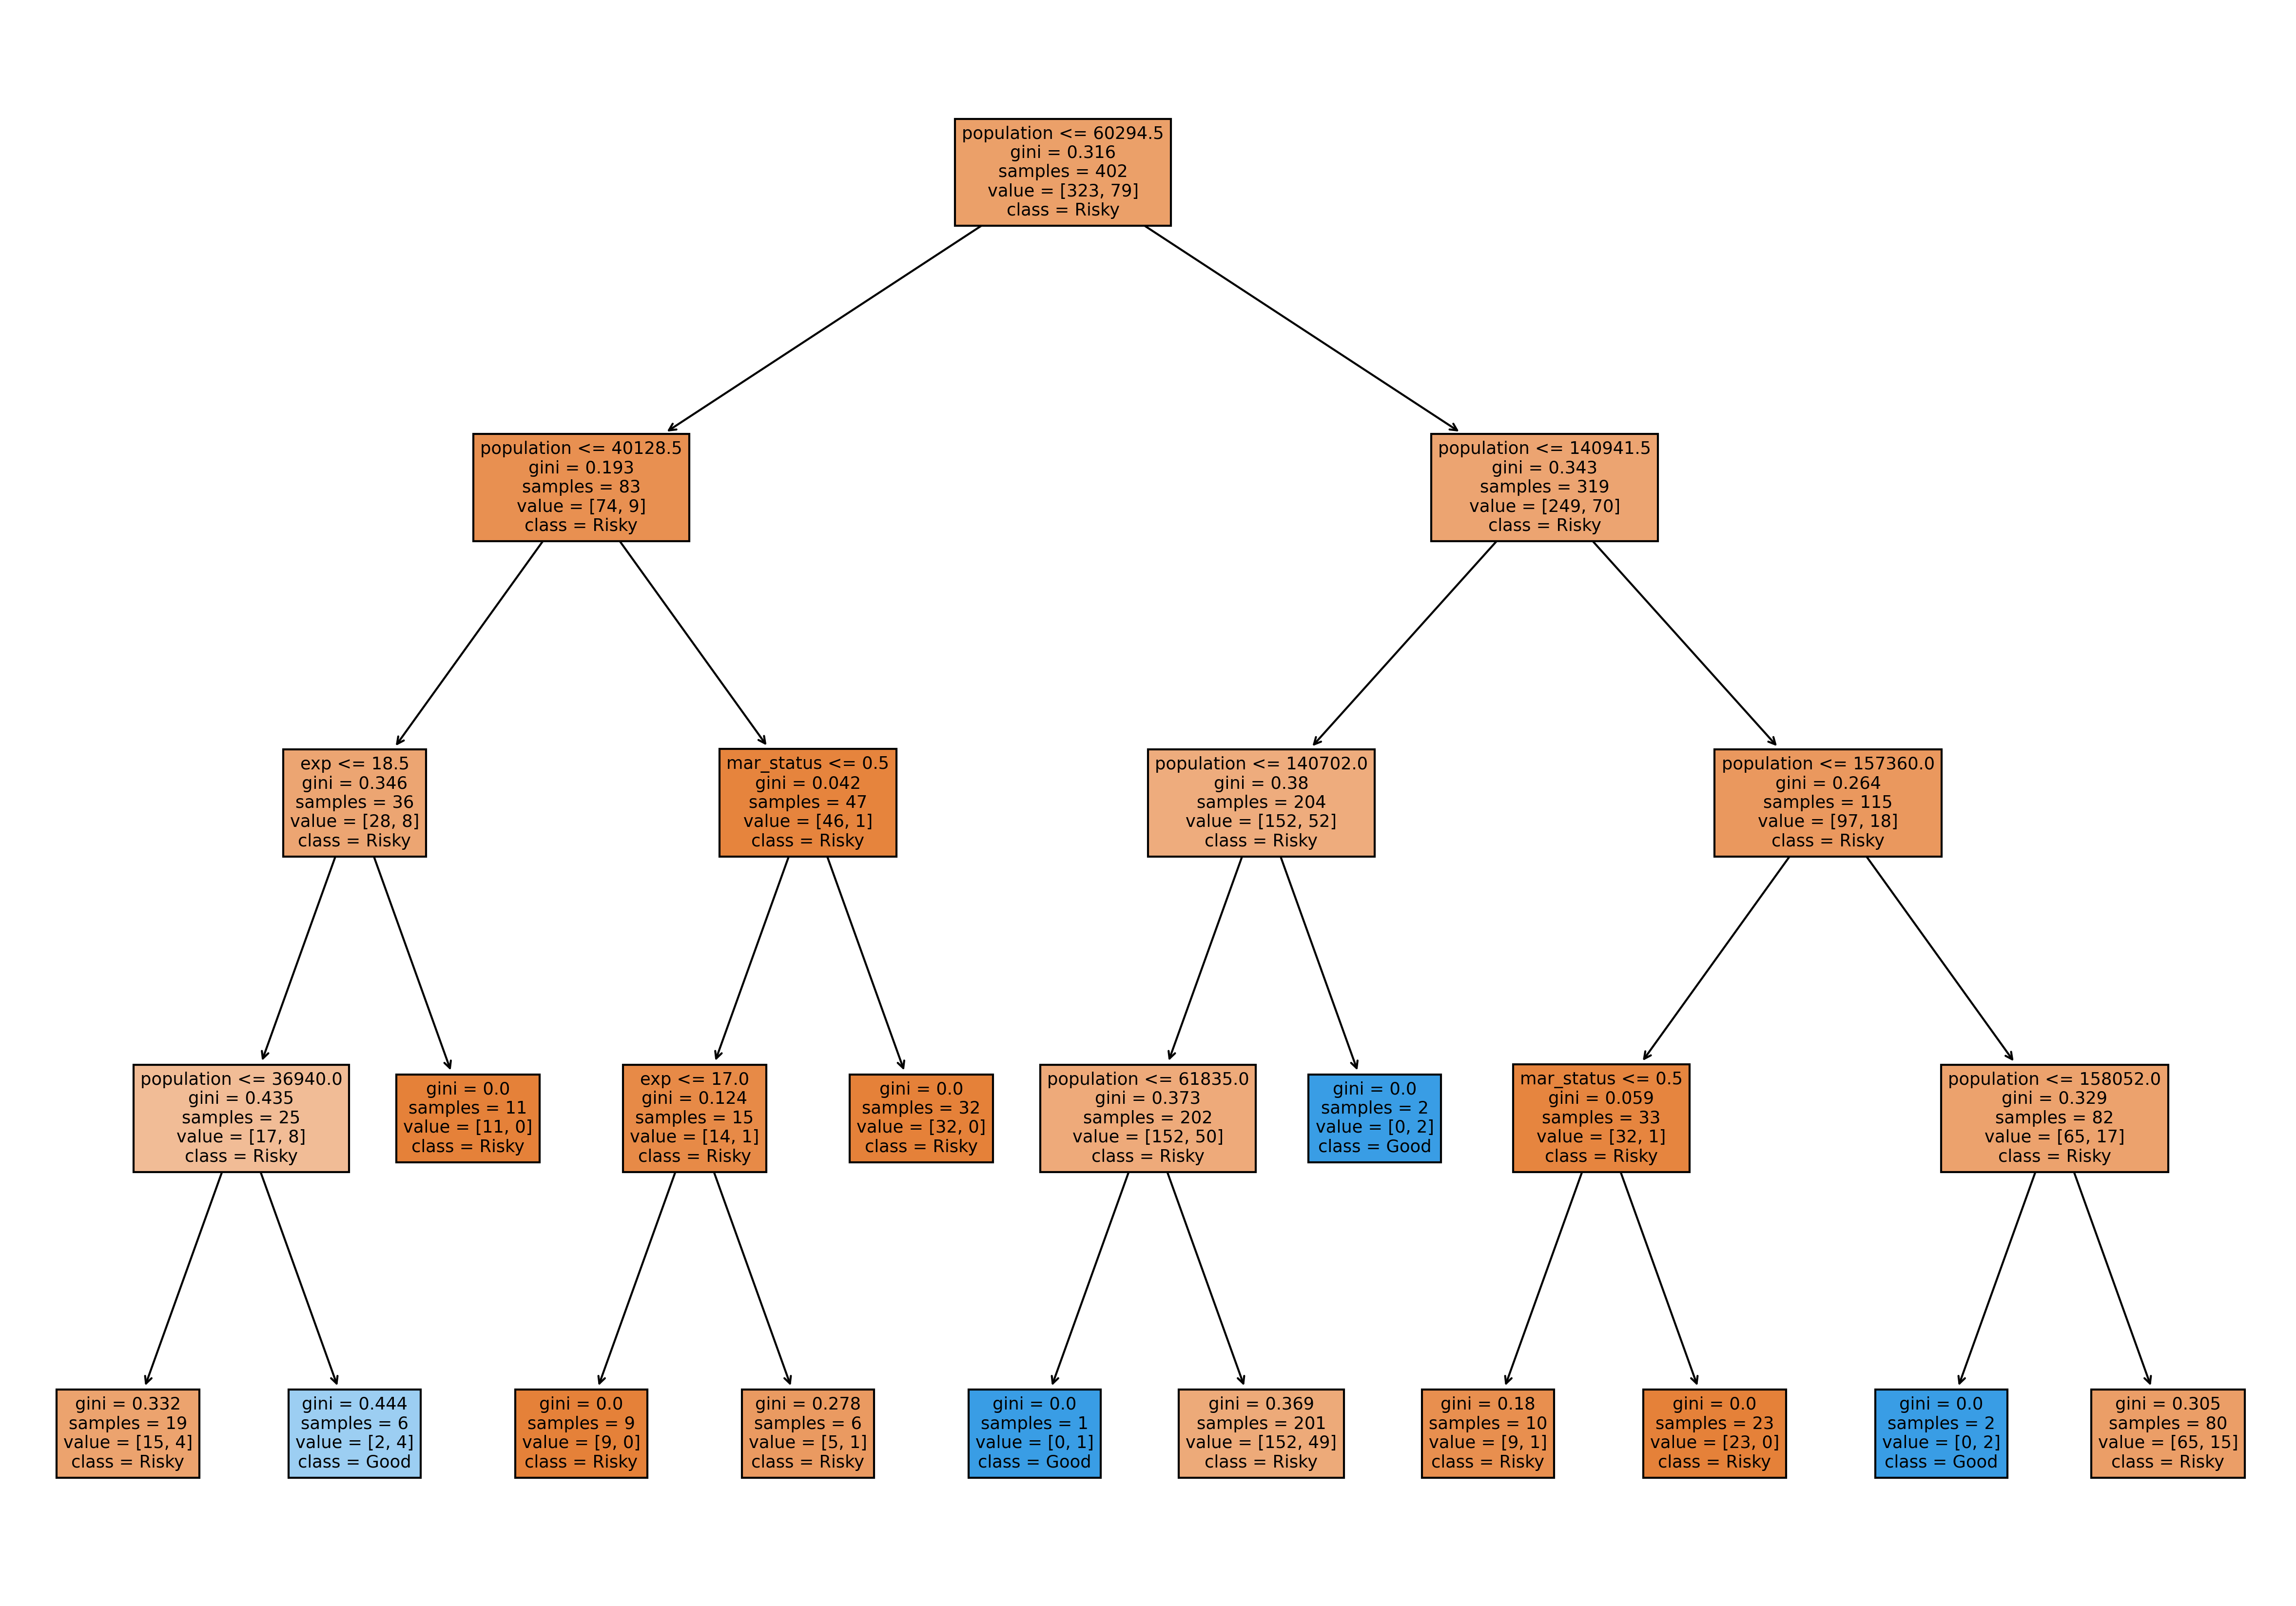

In [28]:
fn=['u_grad', 'mar_status','population','exp','urban']
tn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,14),dpi = 300)
plot_tree(model_gini,
               feature_names = fn, 
               class_names=tn,
               filled = True)
plt.show()

In [29]:
pred_gini = model_gini.predict(x_test)
pred_gini

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [30]:
pd.Series(pred_gini).value_counts()

Good     196
Risky      2
dtype: int64

In [31]:
np.mean(pred_gini == y_test)

0.7626262626262627

                      Building Decision Tree Regressor using MSE Criteria

In [32]:
x = df.iloc[:,2:]
y = df['tax_inc']

In [33]:
#Splitting data into train & test part                  
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.33,random_state=40)

In [40]:
model_reg = DecisionTreeRegressor(criterion = 'mse',max_depth=5)
model_reg.fit(x_train,y_train)

C:\Users\Gujar\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=5)

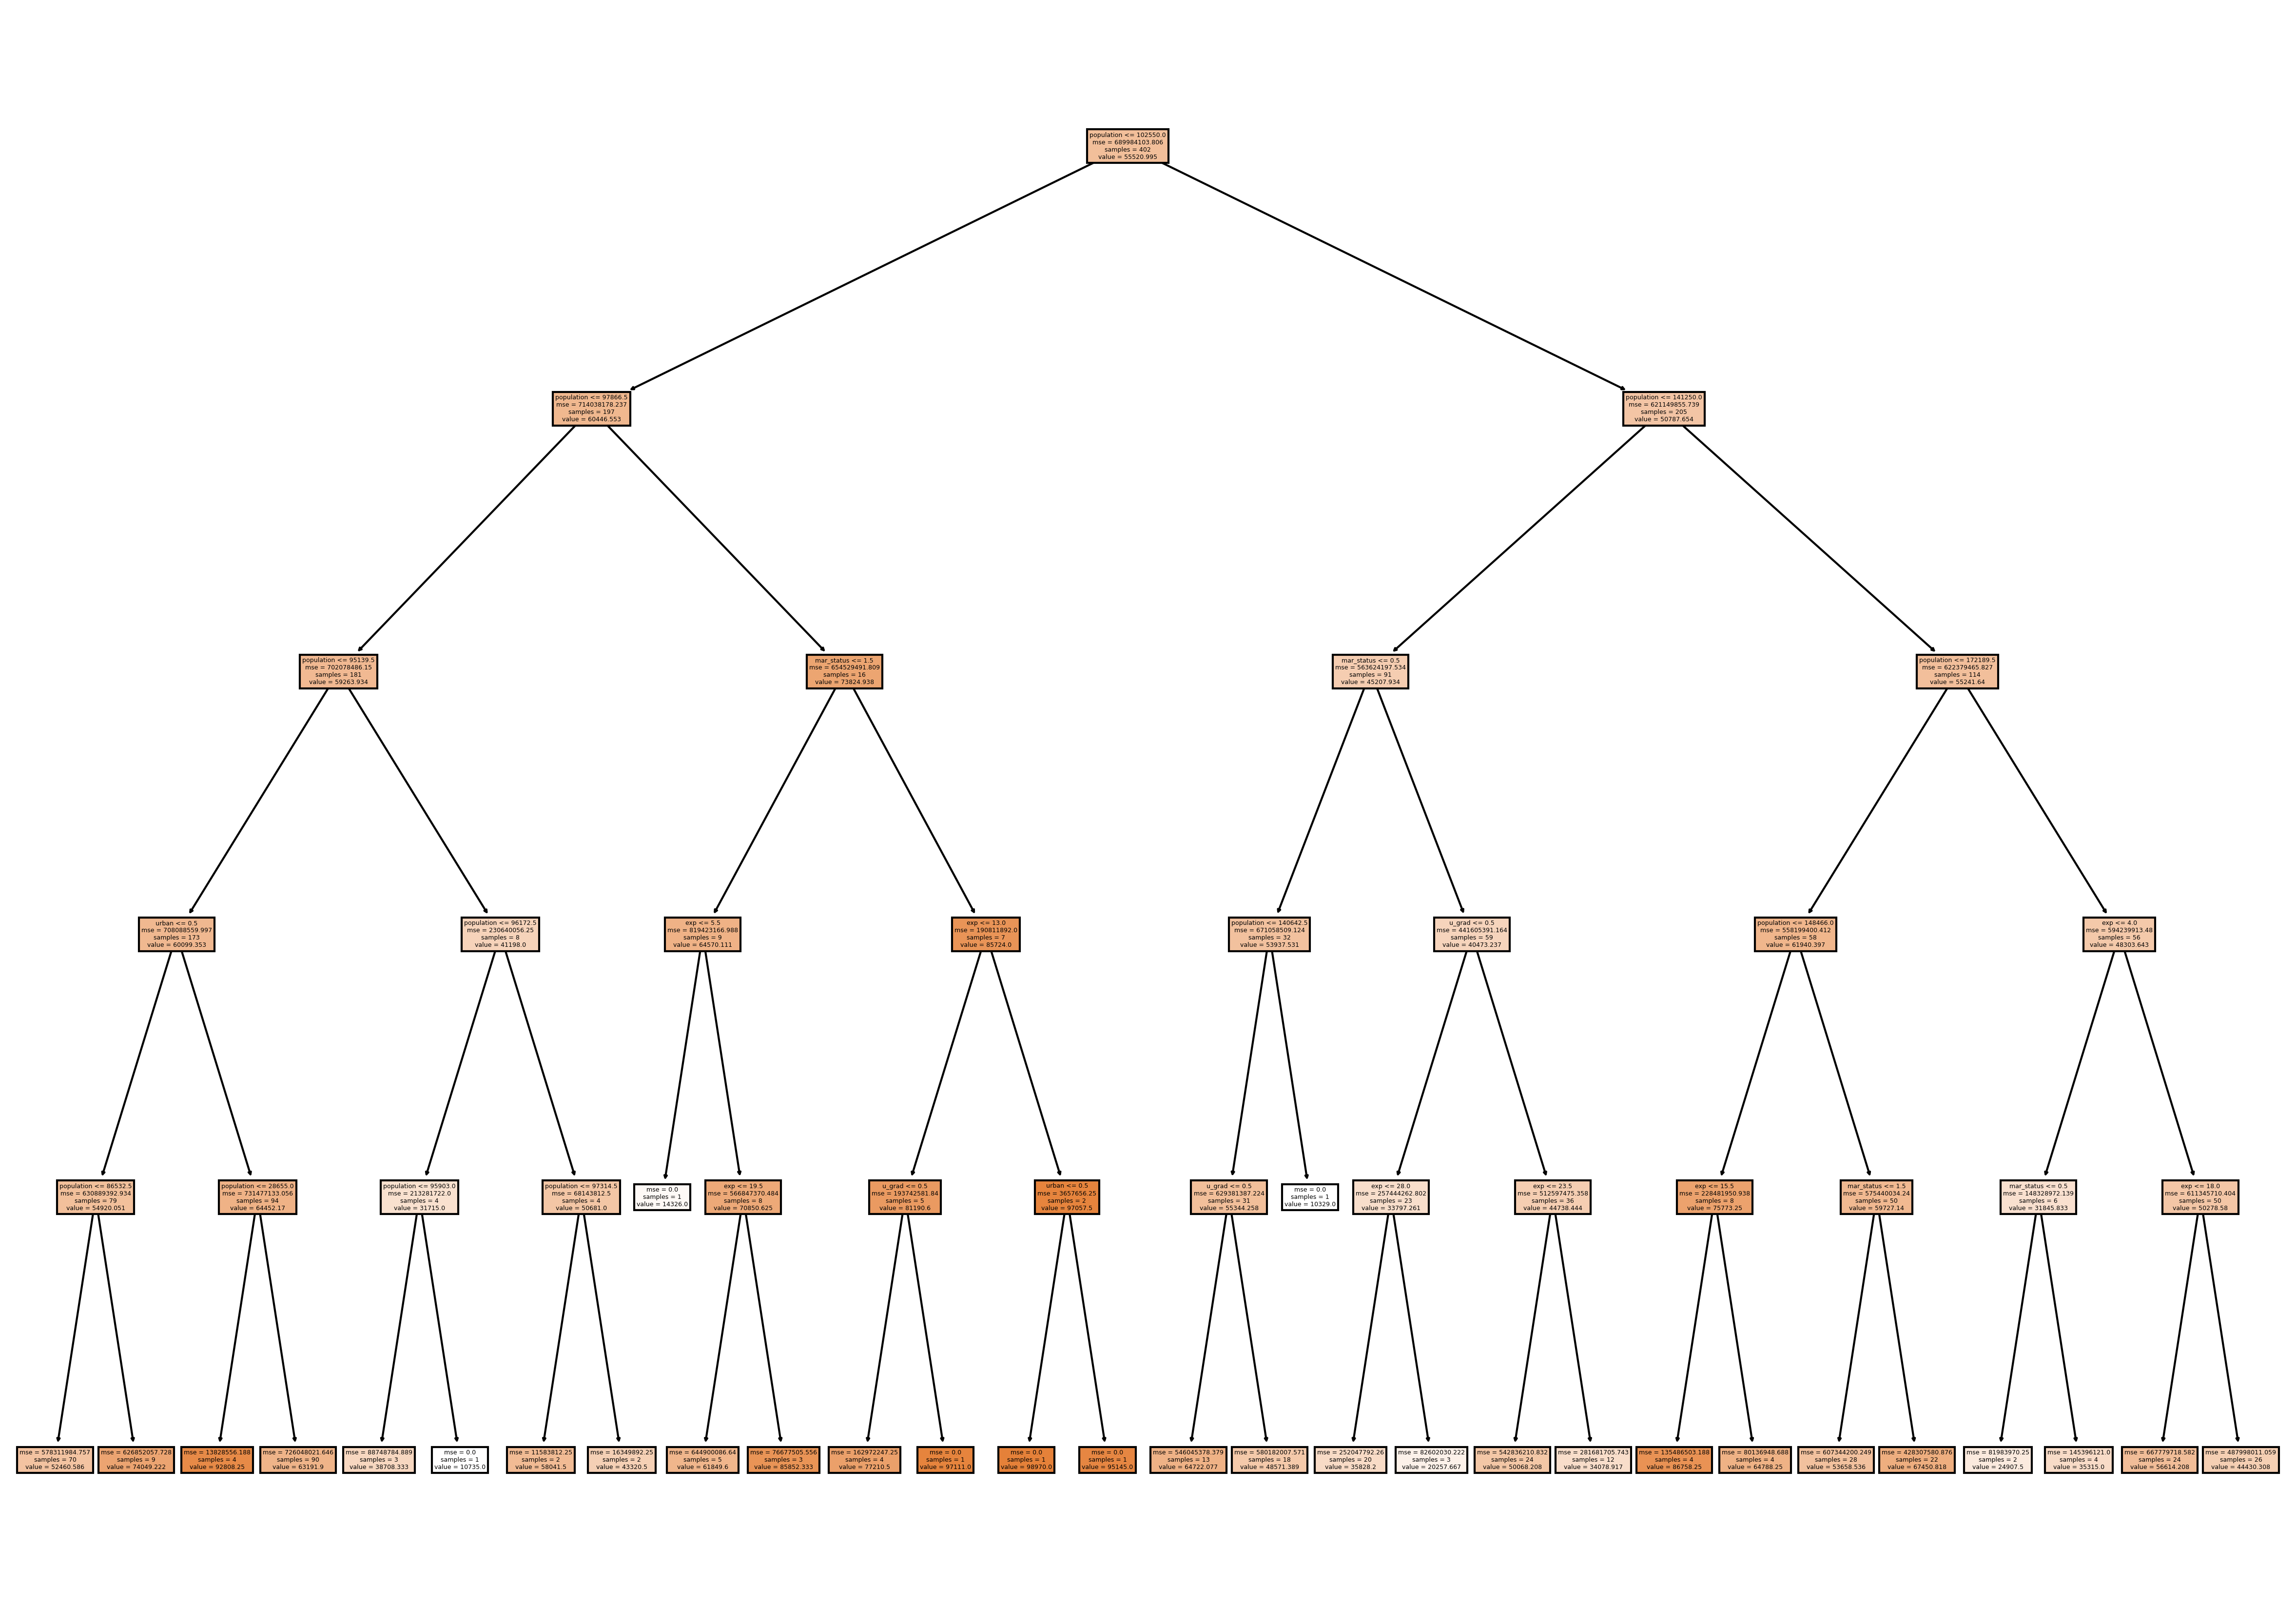

In [41]:
fn=['u_grad', 'mar_status','population','exp','urban']
tn=['tax_inc']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,14),dpi = 300)
plot_tree(model_reg,
               feature_names = fn, 
               class_names=tn,
               filled = True)
plt.show()

In [42]:
pred_reg = model_reg.predict(x_test)
pred_reg

array([52460.58571429, 52460.58571429, 52460.58571429, 56614.20833333,
       50068.20833333, 52460.58571429, 52460.58571429, 35828.2       ,
       63191.9       , 52460.58571429, 50068.20833333, 63191.9       ,
       56614.20833333, 52460.58571429, 50068.20833333, 86758.25      ,
       67450.81818182, 44430.30769231, 35828.2       , 52460.58571429,
       35828.2       , 63191.9       , 52460.58571429, 64722.07692308,
       48571.38888889, 64722.07692308, 52460.58571429, 63191.9       ,
       63191.9       , 63191.9       , 53658.53571429, 52460.58571429,
       86758.25      , 35828.2       , 44430.30769231, 63191.9       ,
       63191.9       , 63191.9       , 35315.        , 53658.53571429,
       52460.58571429, 63191.9       , 63191.9       , 56614.20833333,
       56614.20833333, 67450.81818182, 44430.30769231, 63191.9       ,
       64722.07692308, 56614.20833333, 48571.38888889, 53658.53571429,
       48571.38888889, 50068.20833333, 48571.38888889, 63191.9       ,
      

In [43]:
pd.Series(pred_reg).value_counts()

63191.900000    47
52460.585714    35
50068.208333    15
56614.208333    14
53658.535714    14
44430.307692    13
35828.200000    12
48571.388889     8
86758.250000     7
64722.076923     7
67450.818182     6
34078.916667     4
74049.222222     4
64788.250000     3
35315.000000     2
77210.500000     2
20257.666667     1
95145.000000     1
24907.500000     1
85852.333333     1
58041.500000     1
dtype: int64

In [52]:
model_reg.score(x_train,y_train)

0.2358982197119761

In [49]:
model_reg.score(x_test,y_test)

-0.210853494527518

In [51]:
pred_reg = model_reg.predict(x_test)
pd.DataFrame({'Actual' : y_test,
             'Predicted':pred_reg})

Actual     Predicted
159   62209  52460.585714
307   62873  52460.585714
253   79869  52460.585714
528   91488  56614.208333
137   22773  50068.208333
..      ...           ...
78    73411  86758.250000
380   36156  35315.000000
199   19060  86758.250000
101   35072  63191.900000
438   14398  52460.585714

[198 rows x 2 columns]

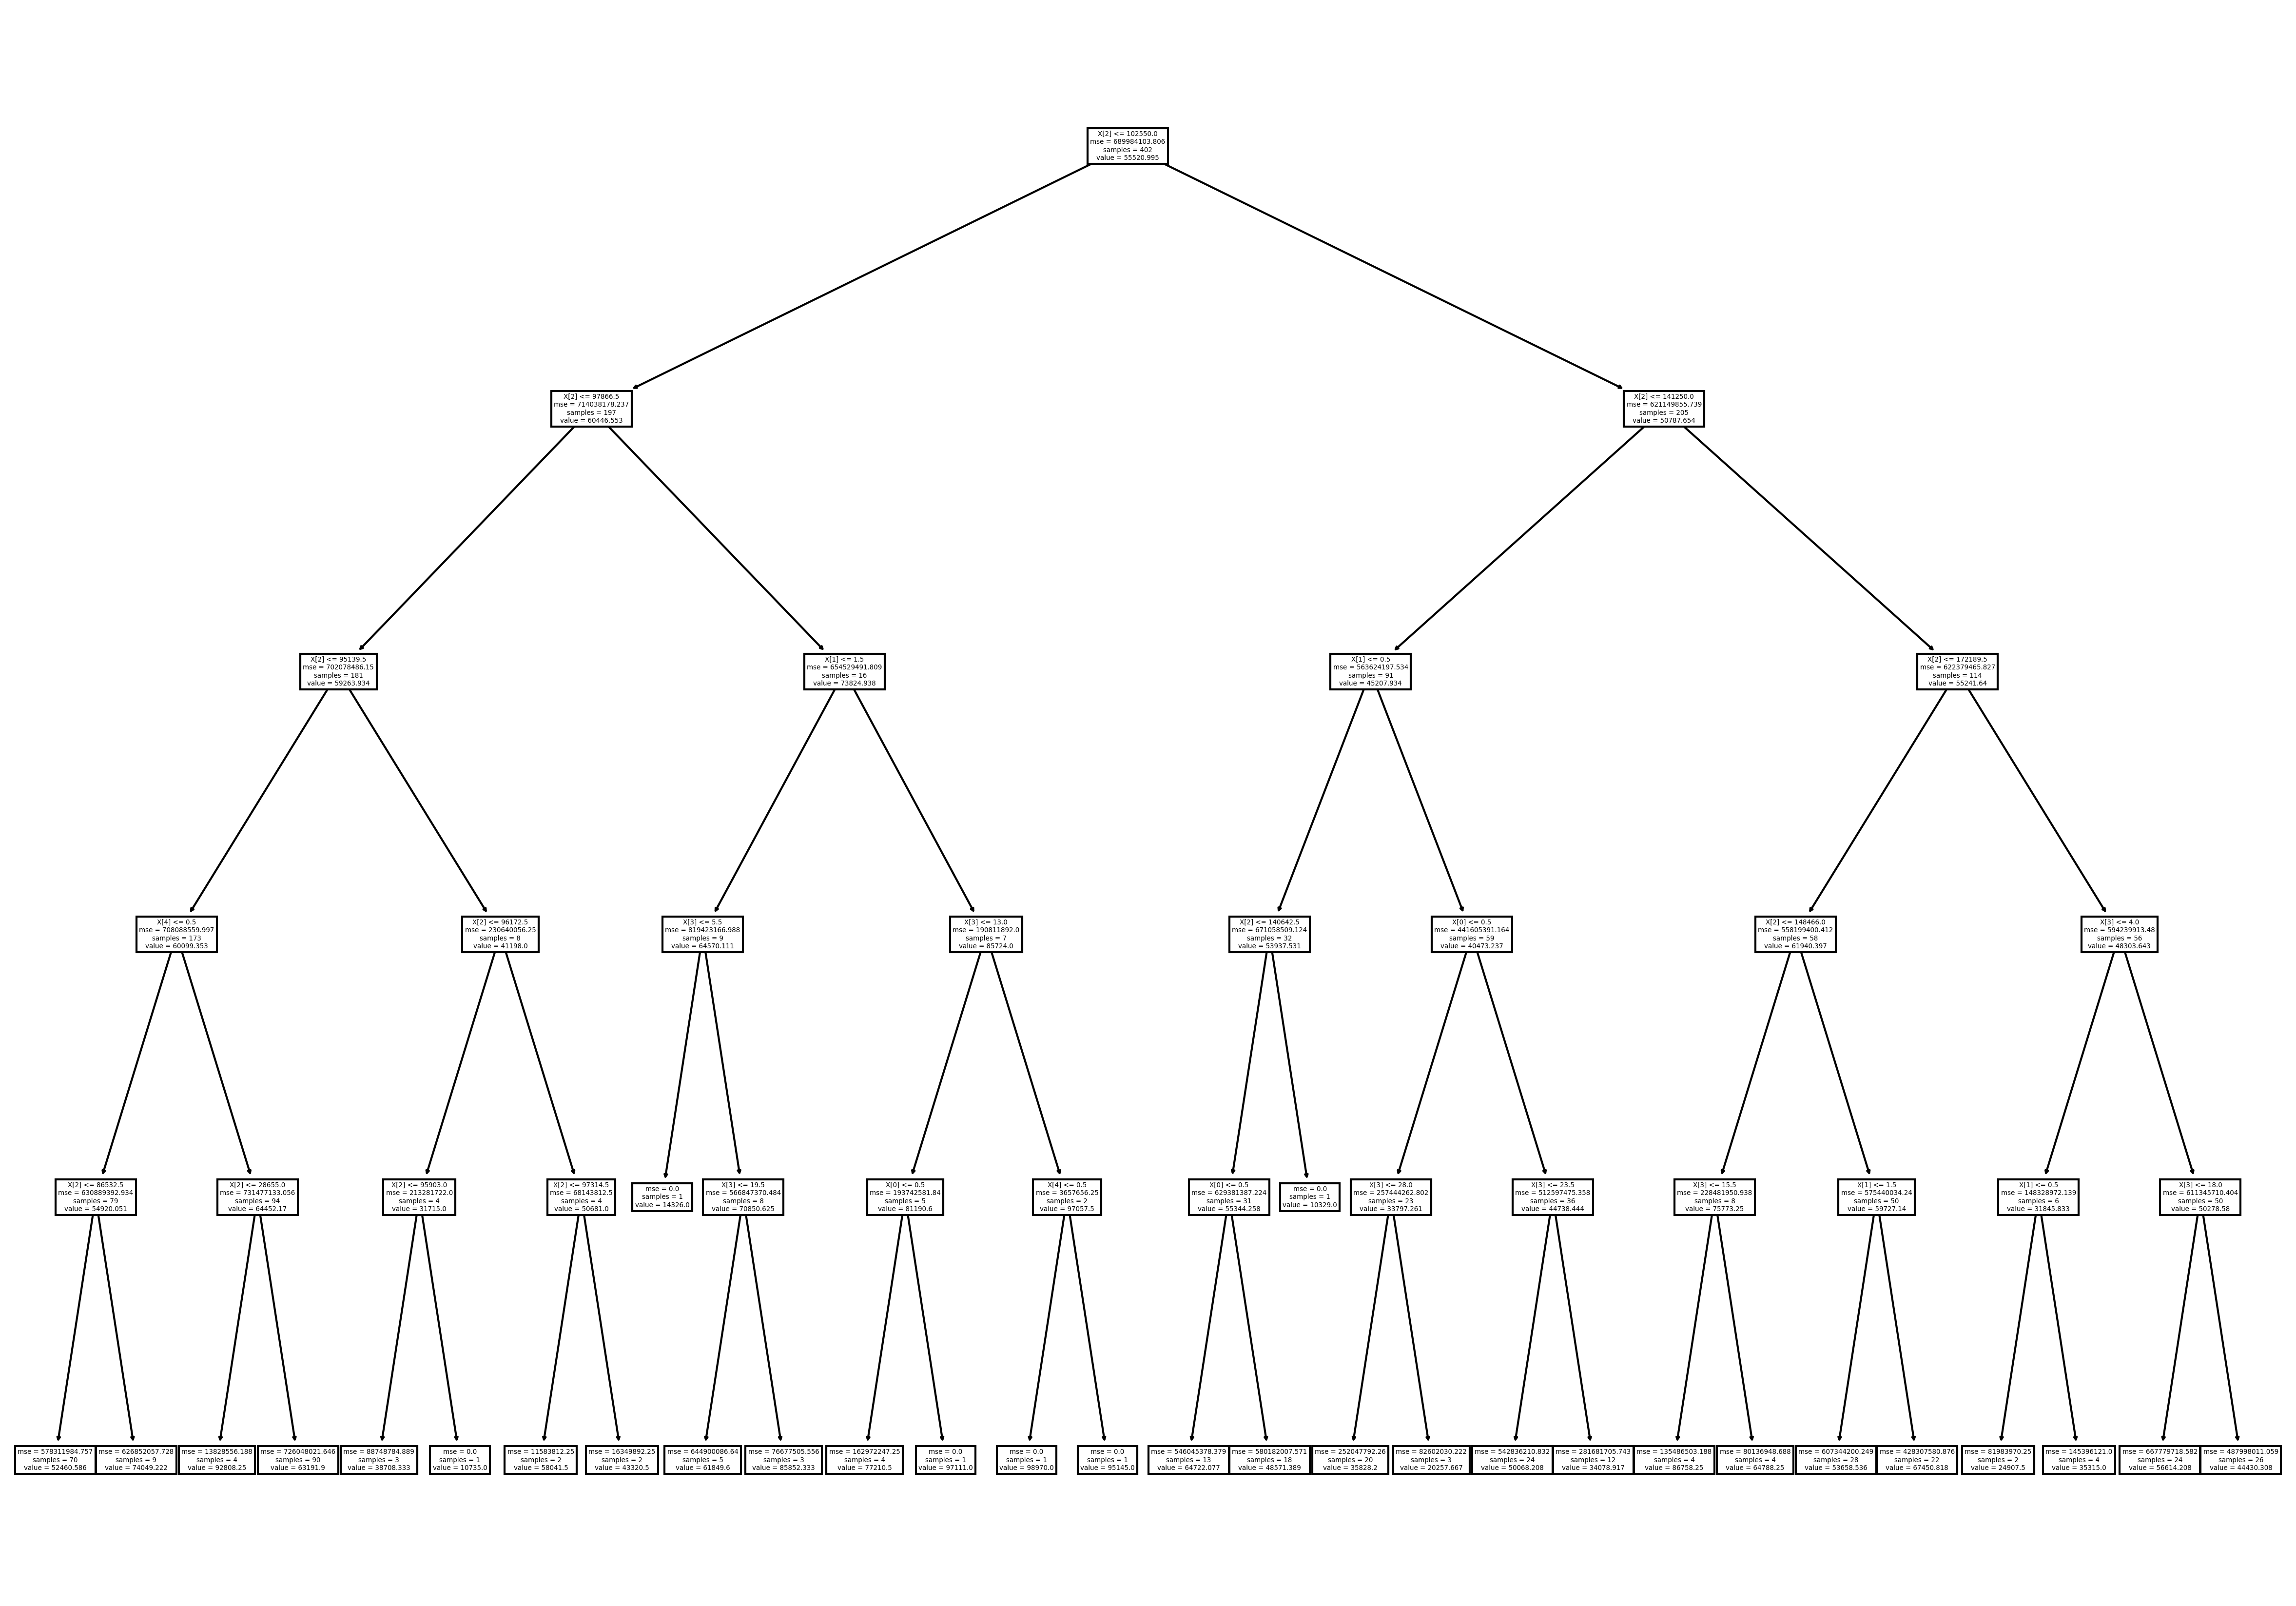

In [50]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,14),dpi = 300)
plot_tree(model_reg)
plt.show()